# Data Science Work Prompt -- Utkarsh Bali

# Firstly, we install all the required libraries

In [49]:
!pip install pandas numpy matplotlib seaborn scikit-learn shap

# Next, we clean our dataset and Normalise it to a scale of 0 to 1 for better analysis

In [50]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# First, we load our data from the CSV file into a pandas DataFrame.
data = pd.read_csv('velocityx_data.csv')

# Let's check for any missing values in the dataset.
print("Missing values in each column:\n", data.isnull().sum())

# We want to focus on numeric columns, excluding any non-numeric ones like 'User ID'.
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# If there are missing values in the numeric columns, we'll fill them with the median values.
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Now, it's important to ensure the data types are appropriate for each column.
data['User ID'] = data['User ID'].astype(str)  # Treating User ID as a string
data['Fan Challenges Completed'] = data['Fan Challenges Completed'].astype(int)  # Making sure this is an integer
data['Predictive Accuracy (%)'] = data['Predictive Accuracy (%)'].astype(float)  # Float for percentage
data['Virtual Merchandise Purchases'] = data['Virtual Merchandise Purchases'].astype(int)
data['Sponsorship Interactions (Ad Clicks)'] = data['Sponsorship Interactions (Ad Clicks)'].astype(int)
data['Time on Live 360 (mins)'] = data['Time on Live 360 (mins)'].astype(float)
data['Real-Time Chat Activity (Messages Sent)'] = data['Real-Time Chat Activity (Messages Sent)'].astype(int)

# Next, let's make sure there are no duplicate rows in our dataset.
data.drop_duplicates(inplace=True)

# We can also look for outliers using the Interquartile Range (IQR) method to identify any unusual data points.
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR)))
print("Outliers:\n", outliers.sum())  # This shows how many outliers we have in each column.

# It’s also a good idea to clean up our column names by stripping any leading or trailing whitespaces.
data.columns = data.columns.str.strip()

# Now we need to normalize or scale our data. 
# We'll use MinMaxScaler to bring all numerical values into a range of 0 to 1.
scaler = MinMaxScaler()
numerical_cols = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases',
                  'Sponsorship Interactions (Ad Clicks)', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])  # Scaling the numerical columns

# Finally, let's take a look at the cleaned and organized dataset.
print("Cleaned Data:\n", data.head())

# We save the cleaned dataset to a new CSV file for future use.
data.to_csv('cleaned_velocityx_data.csv', index=False)

Missing values in each column:
 User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64
Outliers:
 Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64
Cleaned Data:
   User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
0    U001                  0.444444                 0.625000   
1    U002                  0.777778                 0.208333   
2    U003                  0.222222                 0.833333   
3    U004                  0.666667                 0.416667   
4    U005  

# Now, We analyse the cleaned dataset using various prediction models and visualizations:

### Firstly, let's import all the required libraries and do some pre-processing.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
import shap

In [52]:
# We start by loading the cleaned dataset into a DataFrame.
df = pd.read_csv('cleaned_velocityx_data.csv')

# Next, we check for any missing values and fill them with 0 if there are any.
df.fillna(0, inplace=True)

# It’s important to convert our columns to the appropriate data types for further analysis.
df['User ID'] = df['User ID'].astype(str)  # We keep User ID as a string.
numeric_cols = ['Fan Challenges Completed', 'Predictive Accuracy (%)',
                'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)',
                'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)  # Converting numeric columns to the correct types.

# Finally, we print a basic statistics summary of the dataset to get an overview of the data.
print(df.describe())


       Fan Challenges Completed  Predictive Accuracy (%)  \
count                100.000000               100.000000   
mean                   0.532222                 0.520625   
std                    0.313990                 0.292365   
min                    0.000000                 0.000000   
25%                    0.222222                 0.250000   
50%                    0.555556                 0.562500   
75%                    0.777778                 0.760417   
max                    1.000000                 1.000000   

       Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
count                     100.000000                            100.000000   
mean                        0.445000                              0.456842   
std                         0.344147                              0.333701   
min                         0.000000                              0.000000   
25%                         0.166667                              0.1

# Correlation Matrix

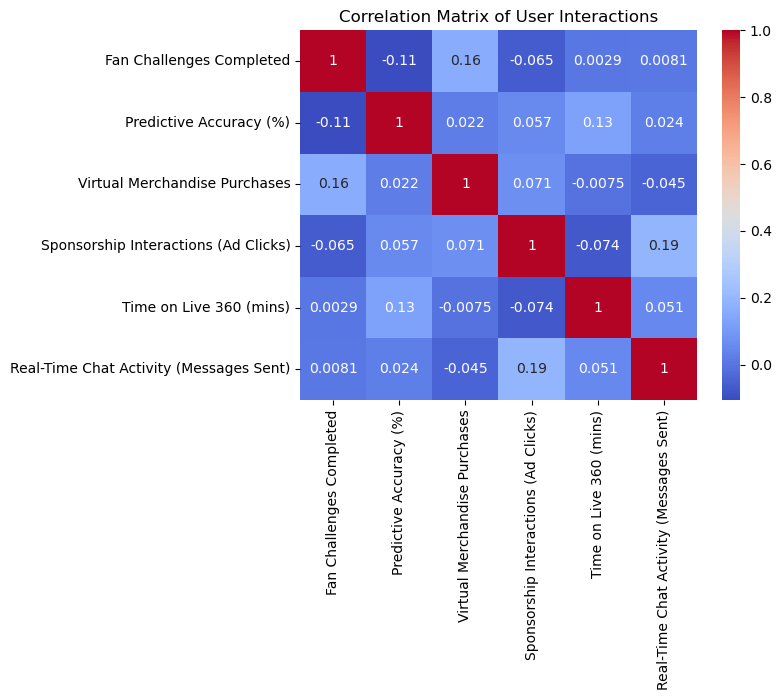

In [53]:
# Next, we create a Correlation matrix
corr_matrix = df[numeric_cols].corr()  # Use only numeric columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of User Interactions')
plt.show()

# From the Correlation Matrix we can say that:
Most of these variables don’t strongly relate to each other. For example, completing Fan Challenges has a weak positive correlation with buying virtual merchandise (0.16) and a slight negative correlation with predictive accuracy (-0.11). The time spent on Live 360 also has a weak positive relationship with predictive accuracy (0.13). Interestingly, there’s a bit of a stronger connection between Sponsorship Interactions (ad clicks) and Real-Time Chat Activity (0.19), suggesting that users who click on ads are a bit more chatty in real-time.

**Bottom line:** These interactions are fairly independent, with just a few showing moderate relationships.


# Pair Plot for all the Numerical Variables

C:\Users\baliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


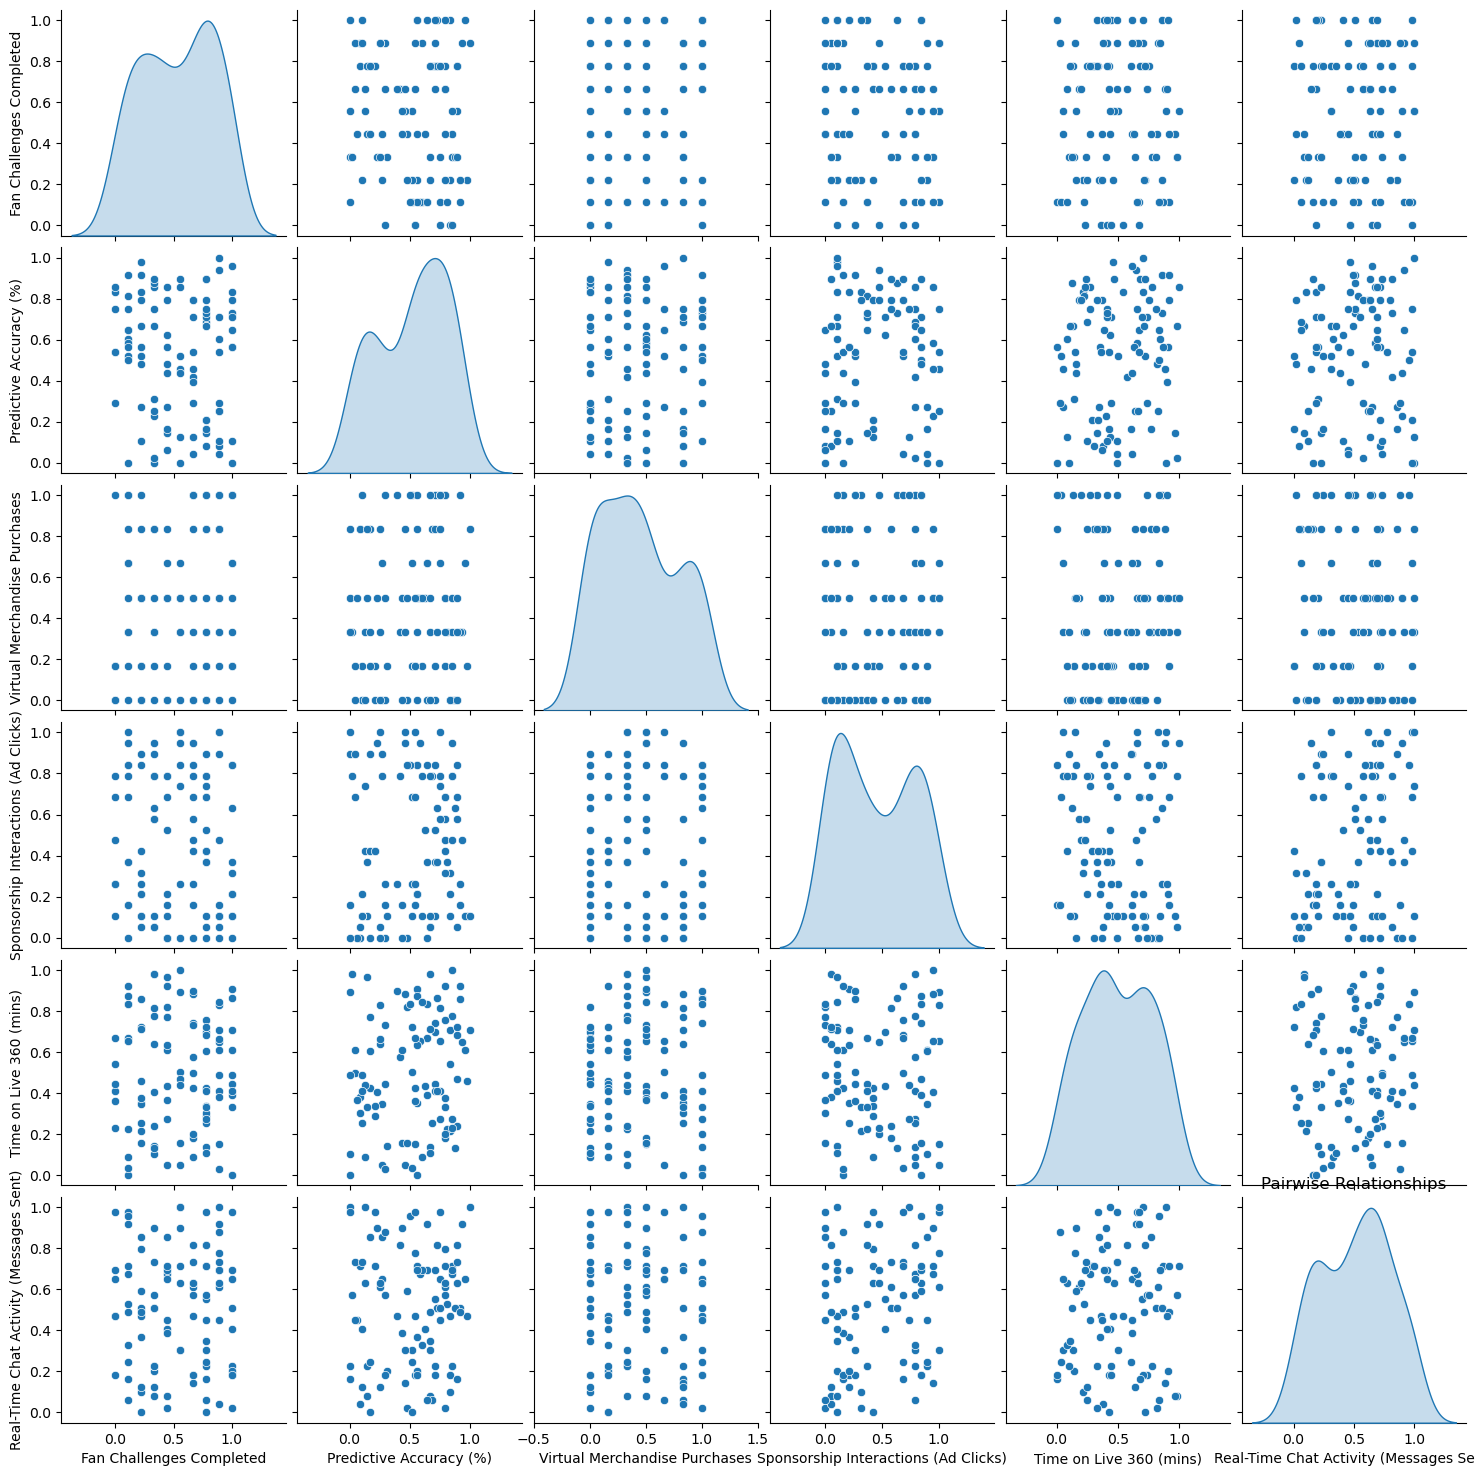

In [54]:
# Now we create Pair plot for all numerical variables
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.title('Pairwise Relationships')
plt.show()

# From this Pair Plot we can deduce the following:

First, looking at the histograms along the diagonal, we can see the distribution of each variable. For instance, **Fan Challenges Completed** shows a bimodal distribution—two distinct peaks—indicating two main groups of users based on the number of challenges they complete. In contrast, **Predictive Accuracy (%)** displays a skewed distribution, with a majority clustering around a specific value, suggesting most users have a similar accuracy level.

Examining the scatter plots, we notice that no pairs of variables exhibit strong linear relationships. **Fan Challenges Completed** and **Virtual Merchandise Purchases** have some scatter but no clear trend, implying that completing more fan challenges doesn't necessarily lead to buying more virtual merchandise. Similarly, **Time on Live 360** and **Predictive Accuracy** don't show a strong correlation, meaning spending more time on Live 360 doesn’t significantly impact users' predictive accuracy.

A bit more spread is seen between **Sponsorship Interactions (Ad Clicks)** and **Real-Time Chat Activity (Messages Sent)**, hinting at a slight tendency for users who click more ads to also be more active in real-time chat, though the relationship isn't strong.

In essence, this analysis reveals that these user engagement metrics are relatively independent of each other, with few moderate relationships.


# Histograms for all features with KDE

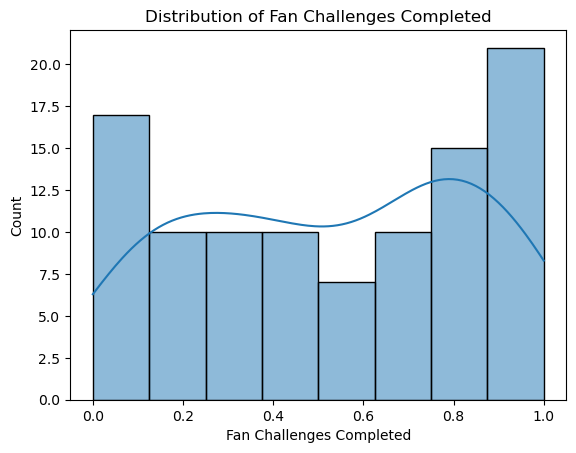

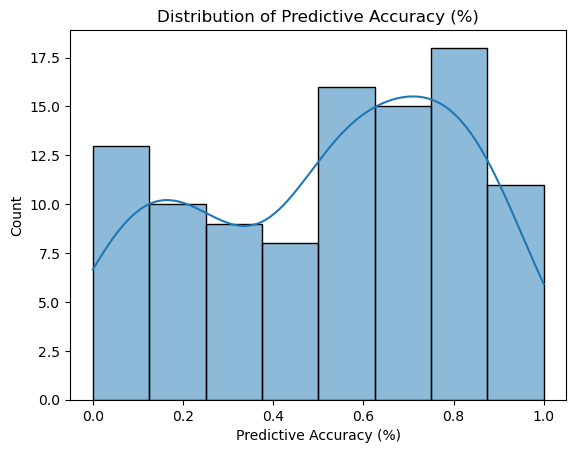

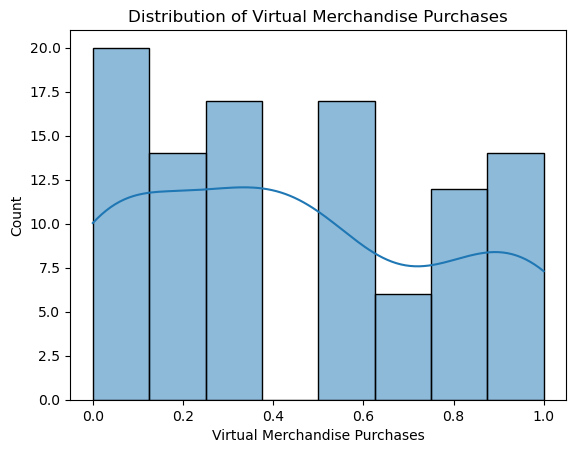

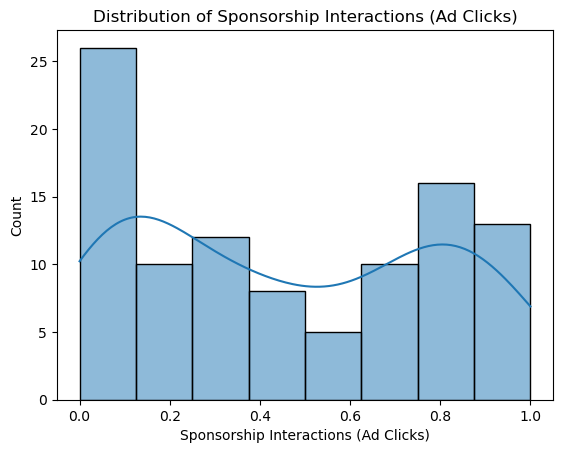

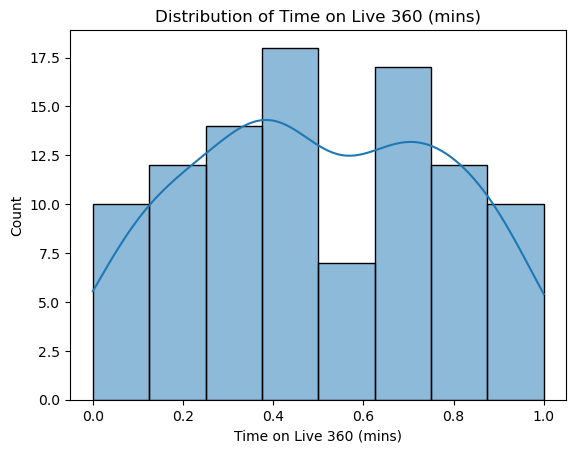

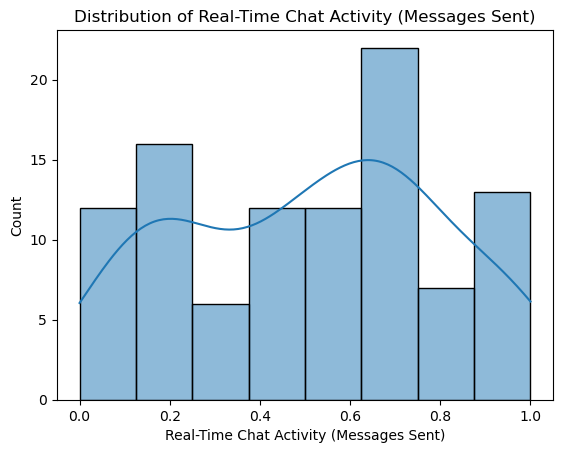

In [55]:
# Now, let's visualize the distributions of our numeric features.
for col in numeric_cols:
    # We use a histogram with a kernel density estimate (KDE) to see the distributions clearly.
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# We can deduce the following from these plots:

## Distribution of Fan Challenges Completed
Here we’ve got a **bimodal distribution**, meaning there are two peaks. A significant number of users either complete no challenges at all or finish every single one. You can see the highest counts at the **1.0 mark** (slightly above 20) and at the **0.0 mark** (around 18). Meanwhile, the middle ground (0.2, 0.4, 0.6) has fewer completions, with the **0.6 mark** being the lowest count at about 7.5.  
What this suggests is that users tend to be all-in or not interested at all when it comes to these challenges. This insight is pretty useful for strategizing user engagement, showing a clear divide between full participation and non-participation.

## Distribution of Predictive Accuracy
The graph tells us how often different accuracy levels appear among users. The x-axis ranges from **0 to 1**, representing the accuracy percentage, while the y-axis shows the count of occurrences. There are three noticeable peaks at around **20%**, **60%**, and **80%**. This means a significant number of users hit these accuracy levels, suggesting some users may struggle with lower accuracy, but quite a few are actually pretty on point, reaching **60%** and **80%**.

## Distribution of Virtual Merchandise Purchases
The x-axis indicates how many purchases, while the y-axis shows how many people made those purchases. We see the highest peak at the **0.0 mark** with a count of **20**, meaning a significant number of users don't make any purchases at all. There are also notable peaks around **0.4** and **0.6**, but there's a clear dip around **0.7**. This pattern suggests that while many users don't engage in buying virtual merchandise, there’s a smaller, committed group who do so moderately, with fewer making high-frequency purchases.

## Distribution of Sponsorship Interactions (Ad Clicks)
The highest peak is at **0.0**, with over **25 counts**, meaning most users don't click on ads at all. As the interaction level increases, the number of clicks generally drops, with a notable dip around **0.5**. There’s a small uptick around **0.8**, but overall, fewer users click on ads more frequently. This pattern reveals that user engagement with ads is quite low, suggesting a need for better targeting or more compelling ad content to boost interaction.

## Distribution of Time on Live 360
The x-axis is **time on Live 360**, ranging from **0.0 to 1.0 minutes**, while the y-axis is how often each time interval occurs. We see two peaks: one around **0.4 minutes** and another around **0.7 minutes**, meaning these are the most common time slots users spend. The highest count is slightly above **17.5** at the **0.4-minute mark**. Interestingly, there's a noticeable dip around **0.6 minutes**. This bimodal distribution tells us that users either spend a short burst of time or a bit longer, with certain intervals being more popular. This could help in understanding user engagement.

## Distribution of Real-Time Chat Activity (Messages Sent)
This graph shows how active users are in real-time chat, measured by the number of messages they send. The histogram with its smooth density line highlights some key points. Most messages are sent around the **0.6 mark**, peaking at over **20 occurrences**. There are also notable peaks at **0.2** and **0.8**, each around **15 occurrences**. Interestingly, there are dips at **0.4** and **0.7**, with only about **5 occurrences** in each. This pattern tells us users tend to cluster their activity in specific ranges, with the highest engagement around that **0.6 mark**. It's like seeing where the most conversation happens in a chat room.


# Let's create a new feature called Engagement Level

In [56]:
# Now let's create a new feature called Engagement Level.
df['Engagement Level'] = (df['Fan Challenges Completed'] + df['Sponsorship Interactions (Ad Clicks)'] +
                          df['Time on Live 360 (mins)'] + df['Real-Time Chat Activity (Messages Sent)'])

# Let's create another new feature based on Predictive Accuracy: High/Low Accuracy Users.


In [57]:
# Another new feature based on Predictive Accuracy; We create High/Low Accuracy Users.
df['High Accuracy User'] = np.where(df['Predictive Accuracy (%)'] > 75, 1, 0)

# Now we standardize data for clustering and apply K-Means Clustering

In [58]:
# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Here we apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\baliu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\baliu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# K-Means Clusters

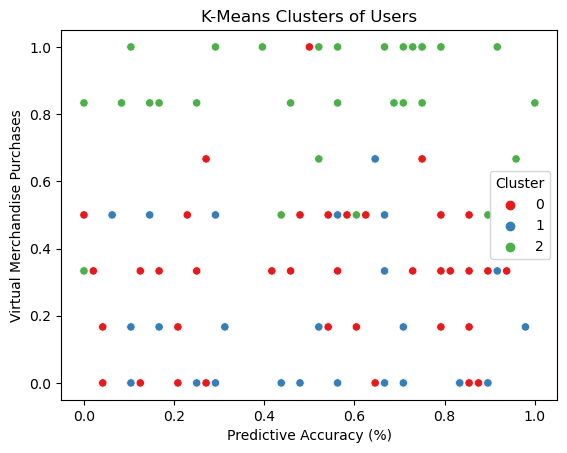

In [59]:
# Let's visualize the clusters we just created
sns.scatterplot(data=df, x='Predictive Accuracy (%)', y='Virtual Merchandise Purchases', hue='Cluster', palette='Set1')
plt.title('K-Means Clusters of Users')
plt.show()

# In these K-Means Clusters:
**Cluster 0 (red)** shows users spread across the lower end of predictive accuracy, with varied but generally lower virtual merchandise purchases. **Cluster 1 (blue)** features users distributed widely across predictive accuracy but concentrated in lower virtual merchandise purchases. Meanwhile, **Cluster 2 (green)** is more balanced and includes users with higher values in both predictive accuracy and merchandise purchases.

In essence, this plot helps us see that users group distinctly: some with low engagement across the board, some with low buying activity but mixed predictive accuracy, and a third group that's quite engaged in both areas.

# Defining Target Variables and training and testing sets

In [60]:
# Let's define our feature set and target variable.
# We’re selecting key features that might influence merchandise purchases.
X = df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)',
        'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 'Engagement Level']]

# Our target variable will be whether a user has made any merchandise purchases (binary).
y = df['Virtual Merchandise Purchases'] > 0  # This creates a True/False indicator for purchases.

# Now we’ll split the data into training and testing sets.
# We'll use 30% of the data for testing to evaluate our model later.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [61]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         5
        True       0.83      1.00      0.91        25

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30



C:\Users\baliu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baliu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\baliu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analyzing the Logistic Regression Classification Report:
For the **False** category, the model didn't perform well—it has a precision, recall, and F1-score of **0.0** across the board, which means it couldn’t correctly identify any False cases out of **5**. On the flip side, for the **True** category, it did much better with a precision of **0.83**, recall of **1.00**, and an F1-score of **0.91**, indicating it accurately identified True cases most of the time.

Overall, the accuracy of the model is **83%**, meaning it got the classification right **83%** of the time out of **30** cases. The macro average, which treats both classes equally, has lower scores (around **0.42-0.50**), showing imbalance in performance. However, the weighted average, which accounts for the number of True and False cases, is higher, around **0.69-0.83**.

# Decision Tree

In [62]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.22      0.40      0.29         5
        True       0.86      0.72      0.78        25

    accuracy                           0.67        30
   macro avg       0.54      0.56      0.53        30
weighted avg       0.75      0.67      0.70        30



# Analyzing the Decision Tree Classification Report:
For the **False** category, the model didn’t do so hot, with a precision of **0.14**, recall of **0.20**, and an F1-score of **0.17**. Essentially, it struggled to correctly identify False cases out of **5**. For the **True** category, it fared much better with a precision of **0.83**, recall of **0.76**, and an F1-score of **0.79**, meaning it accurately identified True cases most of the time.

Overall accuracy is at **67%**, meaning the model got the classification right two-thirds of the time out of **30** cases. The macro average, which considers both classes equally, sits at **0.48** across the board, reflecting the imbalance in performance. The weighted average, which accounts for the number of True and False cases, is higher at **0.71-0.69**, indicating better overall performance when factoring in the skew towards the True category.

# Random Forest

In [63]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=48)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.33      0.20      0.25         5
        True       0.85      0.92      0.88        25

    accuracy                           0.80        30
   macro avg       0.59      0.56      0.57        30
weighted avg       0.77      0.80      0.78        30



# Analyzing the Random Forest Classification Report:
For the **False** category, the model’s performance is quite low: precision is at **0.33**, recall is **0.20**, and F1-score stands at **0.25**. This means that when predicting False, the model correctly identifies only a small fraction. On the other hand, for the **True** category, the model performs much better with a precision of **0.85**, recall of **0.92**, and an F1-score of **0.88**, showing it accurately identifies True cases most of the time.

Overall, the model has an accuracy of **80%**, meaning it correctly classifies **80%** of the cases out of **30**. The macro average, which treats both classes equally, shows lower scores (around **0.56-0.59**), reflecting the imbalance in performance. However, the weighted average, which accounts for the number of True and False cases, is higher, around **0.77-0.80**, indicating a more balanced overall performance considering the skew towards the True category.

# Fit the Random Forest Model and Create SHAP Summary Plot

C:\Users\baliu\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\baliu\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


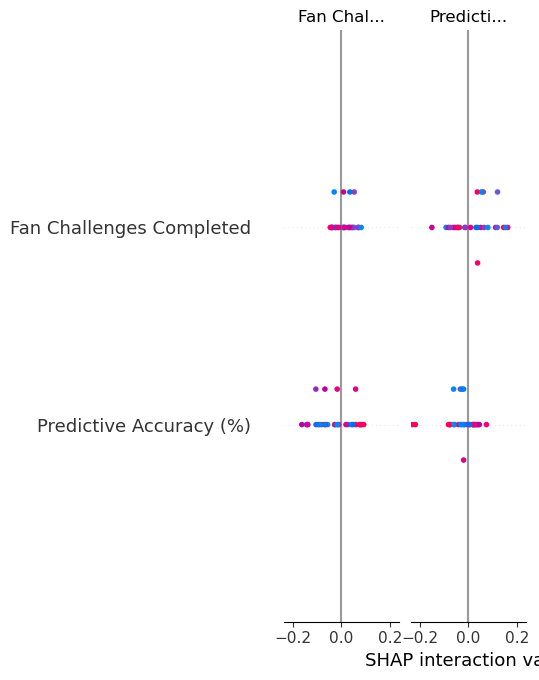

In [64]:
# here we fit the Random Forest model
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)
plt.show()

# Analysis of SHAP Summary Plot:

For **Fan Challenges Completed**, the SHAP values are mostly centered around zero, with only minor positive or negative interactions. This means this feature has a generally neutral impact on the model's predictions.

For **Predictive Accuracy (%)**, while it also clusters around zero, it has a slightly broader range of interaction effects compared to Fan Challenges Completed. This indicates that although this feature generally has a neutral impact, there are more cases where it notably influences the model's predictions, positively or negatively.

Overall, these features don't heavily sway the model's predictions, but **Predictive Accuracy (%)** shows a bit more variability in its impact.

# Engagement Levels Histogram with KDE

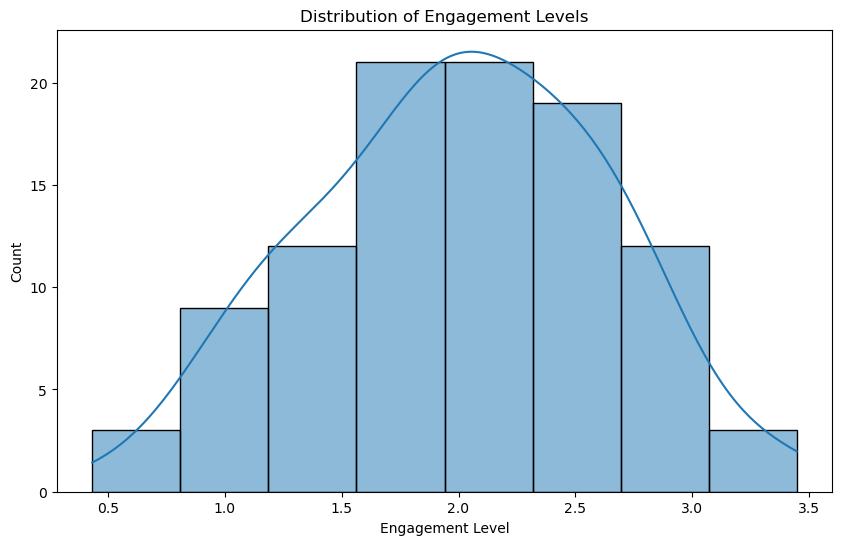

In [65]:
# Visualizing the distribution of engagement levels with a histogram and KDE.
plt.figure(figsize=(10, 6))
sns.histplot(df['Engagement Level'], kde=True)
plt.title('Distribution of Engagement Levels')
plt.show()

# Analysis of the Engagement level plot:
Most users hover around an engagement level of **2.0**, which is the peak of the graph. This suggests a fairly balanced engagement, with most users showing a moderate level of interaction. The distribution is symmetrical, tapering off evenly toward the lower and higher ends, suggesting a normal distribution. This pattern tells us that while a few users have low or high engagement, the majority are somewhere in the middle.

# Box Plot of Engagement Level Cluster-wise

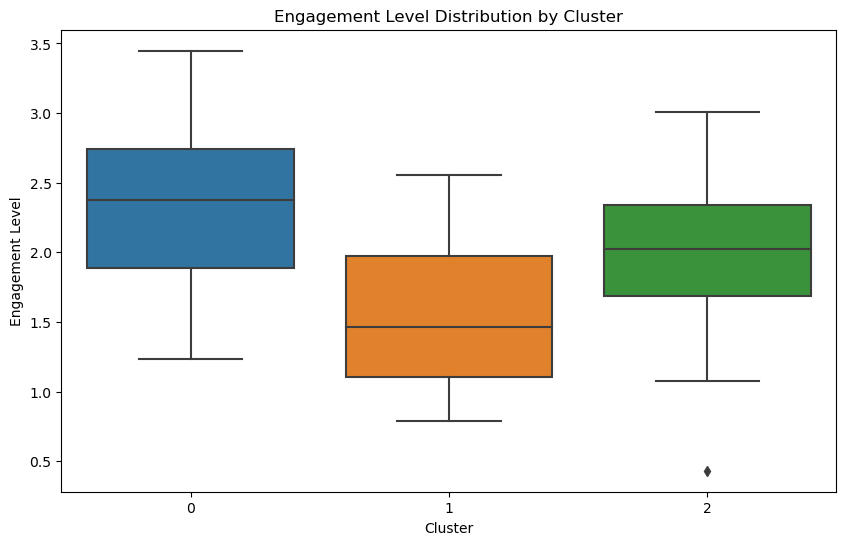

In [66]:
# Engagement Level Distribution by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Engagement Level', data=df)
plt.title('Engagement Level Distribution by Cluster')
plt.show()

# Analyzing the Engagement Level by Cluster:
**Cluster 0** stands out with a higher median engagement level around **2.5**, meaning users in this group are generally more engaged. The range for Cluster 0 is wide, from about **1.0** to **3.5**, indicating diverse engagement levels within this group. 

**Cluster 1** has a much lower median around **1.5**, showing less engagement overall, with most values lying between **1.0** and **2.0**. 

**Cluster 2** has a median of approximately **2.0**, placing it between the other two clusters in terms of engagement, and its range spans from **1.0** to **3.0**, with one notable outlier below **0.5**.


# Heat Map of Correlation with Target Variable

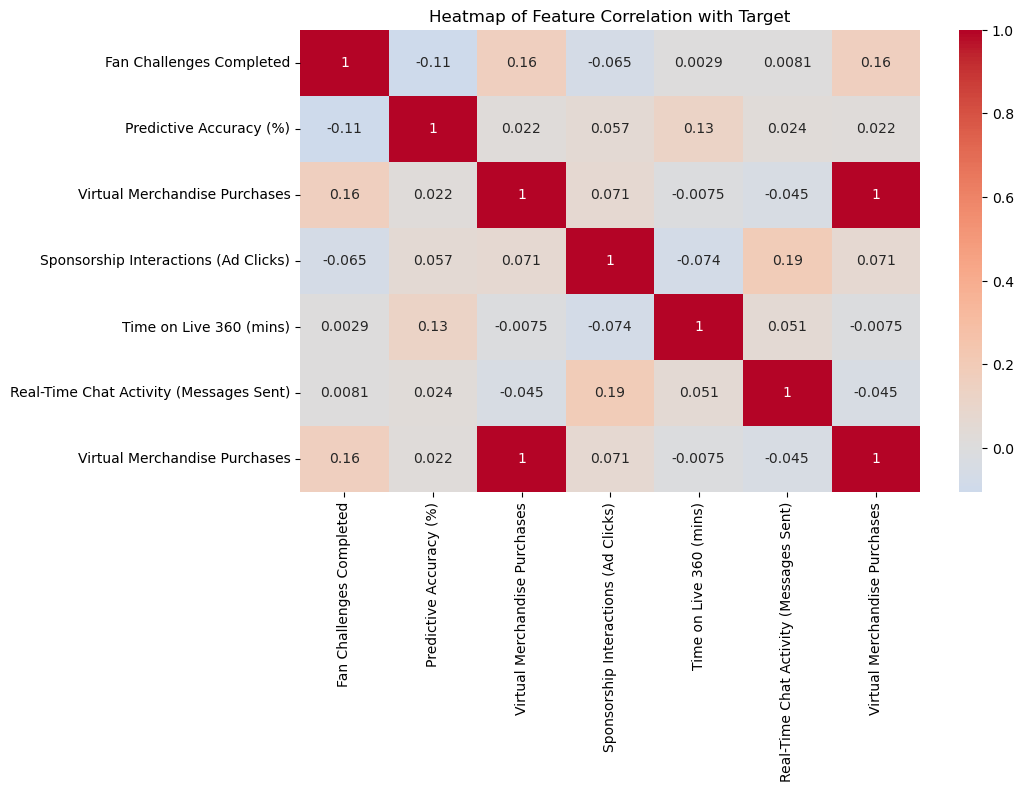

In [67]:
# Heatmap of Correlation with Target
plt.figure(figsize=(10, 6))
correlation_with_target = df[numeric_cols + ['Virtual Merchandise Purchases']].corr()
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Feature Correlation with Target')
plt.show()

# Analyzing the Heat Map:
**Fan Challenges Completed** has a moderate positive correlation (**0.16**) with **Virtual Merchandise Purchases**, indicating that people who complete more challenges are somewhat more likely to buy virtual goods. 

**Predictive Accuracy (%)** shows a weak positive correlation (**0.13**) with **Time on Live 360 (mins)**, suggesting a slight trend that those who spend more time on Live 360 might be a bit more accurate in their predictions. 

The most interesting pair is **Sponsorship Interactions (Ad Clicks)** and **Real-Time Chat Activity (Messages Sent)**, with a weak positive correlation (**0.19**), hinting that users who interact with ads also tend to be more active in chat.

# ROC Curve for the Random Forest Model

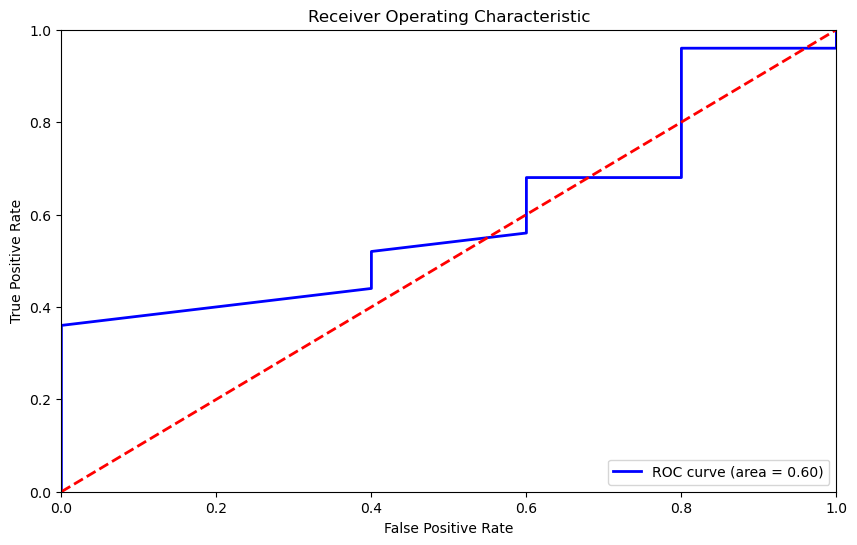

In [68]:
# ROC Curve for Random Forest Model
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Analyzing the ROC Curve:
Our model's ROC curve hugs the red dashed line more closely than we’d like. With an **AUC (Area Under the Curve)** of **0.60**, it tells us that the model's ability to distinguish between the positive and negative classes is slightly better than random chance, but it's not very strong. Ideally, we'd want the blue line to be higher, indicating better performance.

# Feature Pairwise Relationships Colored Cluster-wise

C:\Users\baliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


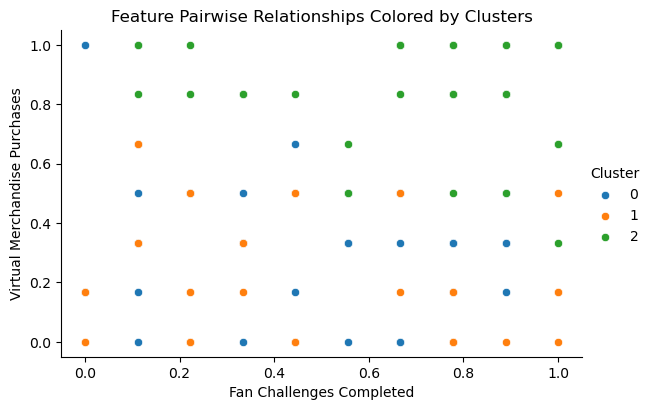

In [69]:
# Feature Pairwise Relationships Colored by Clusters
g = sns.FacetGrid(df, hue='Cluster', height=4, aspect=1.5)
g.map(sns.scatterplot, 'Fan Challenges Completed', 'Virtual Merchandise Purchases')
g.add_legend()
plt.title('Feature Pairwise Relationships Colored by Clusters')
plt.show()

# We can deduce the following from these Feature Pairwise Relationships:

**Cluster 0 (blue)** is mostly concentrated at the lower end of both features, meaning these users complete fewer challenges and buy less merchandise. 

**Cluster 1 (orange)** spreads more evenly across the middle range, indicating a moderate engagement in both areas. 

Meanwhile, **Cluster 2 (green)** is concentrated at the higher values, suggesting these users are highly engaged, both completing more challenges and buying more virtual goods.

# Histogram of Engagement Levels with higher bins

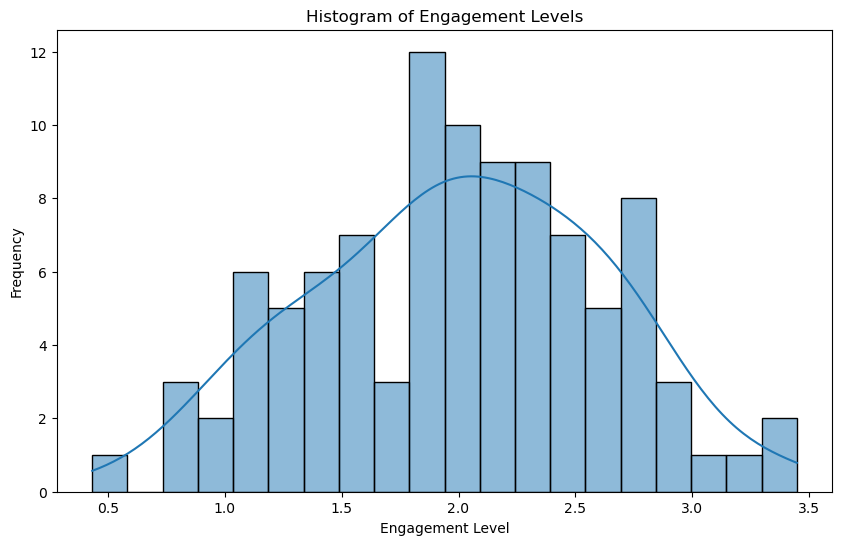

In [70]:
# Histogram of Engagement Levels
plt.figure(figsize=(10, 6))
sns.histplot(df['Engagement Level'], bins=20, kde=True)
plt.title('Histogram of Engagement Levels')
plt.xlabel('Engagement Level')
plt.ylabel('Frequency')
plt.show()

# Analyzing the Engagement level histogram:
The x-axis represents the **engagement level**, ranging from **0.5** to **3.5**, while the y-axis shows the **frequency of users** at each engagement level. The highest peak is around an engagement level of **2.0**, where the frequency reaches **12**, suggesting that most users fall into this category. 

The distribution looks fairly normal, peaking in the middle and tapering off towards the lower and higher ends. This means that user engagement is mostly centered around a moderate level, with fewer users showing very low or very high engagement.

# Violin Plot of Engagement Levels Cluster-wise

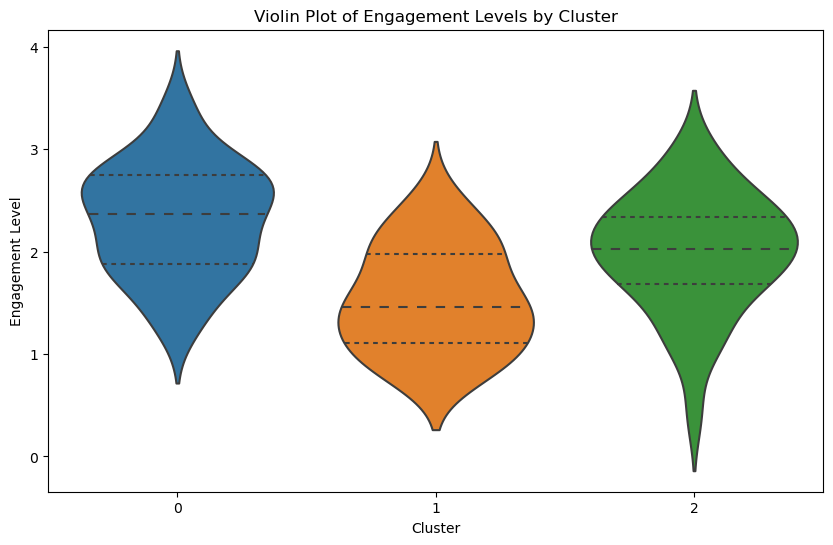

In [71]:
# Violin Plot of Engagement Levels by Cluster
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cluster', y='Engagement Level', data=df, inner='quartile')
plt.title('Violin Plot of Engagement Levels by Cluster')
plt.show()

# Analyzing the Violin Plot Cluster-wise:
**Cluster 0** has a wide distribution, with higher density around engagement levels **2** and **3**. This means users in this cluster are quite varied but lean towards higher engagement. 

**Cluster 1**, in orange, shows a narrower distribution with the highest density around levels **1** and **2**, indicating lower and more consistent engagement. 

**Cluster 2**, in green, displays a symmetrical distribution, also with higher densities around levels **2** and **3**, similar to cluster 0 but with a slightly different shape. This suggests that clusters 0 and 2 have more engaged and varied users, while cluster 1 consists of users with lower, more uniform engagement levels.

# Pair Plot for all features

C:\Users\baliu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


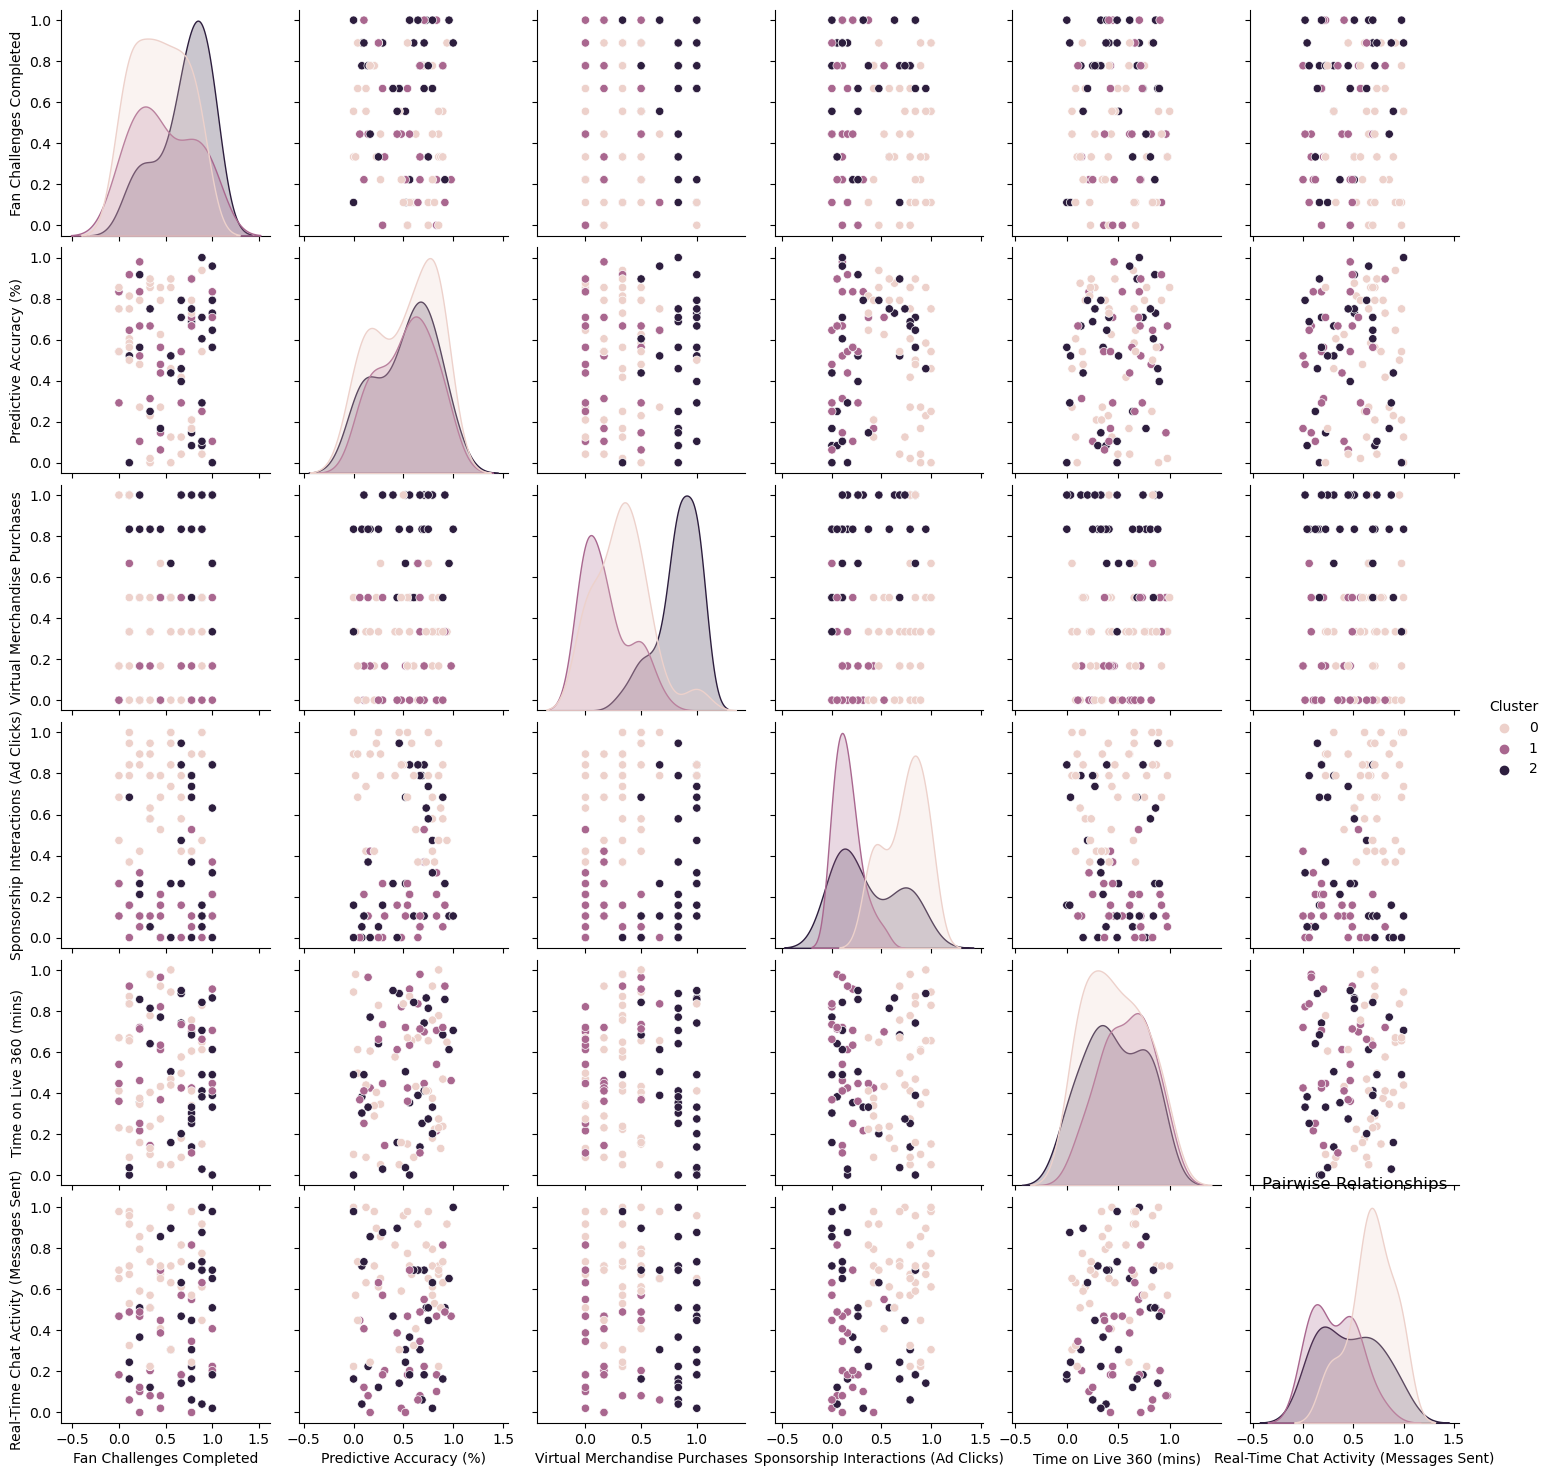

In [72]:
# Pair Plot of All Features
sns.pairplot(df[numeric_cols + ['Cluster']], hue='Cluster')
plt.title('Pairwise Relationships')
plt.show()

# Important things we can deduce from this pair-plot:
What jumps out first is that **Fan Challenges Completed** shows distinct distributions across clusters. **Cluster 0** has lower values, while **clusters 1 and 2** trend higher, suggesting different user behaviors. 

There's a positive correlation between **Fan Challenges Completed** and **Predictive Accuracy (%)**, meaning more challenges often equal better accuracy. Similarly, **Virtual Merchandise Purchases** and **Sponsorship Interactions (Ad Clicks)** positively correlate, hinting that users who buy more virtual goods also click more ads.

# Joint Plot of Predictive Accuracy and Virtual Merchandise Purchases

<Figure size 1000x1000 with 0 Axes>

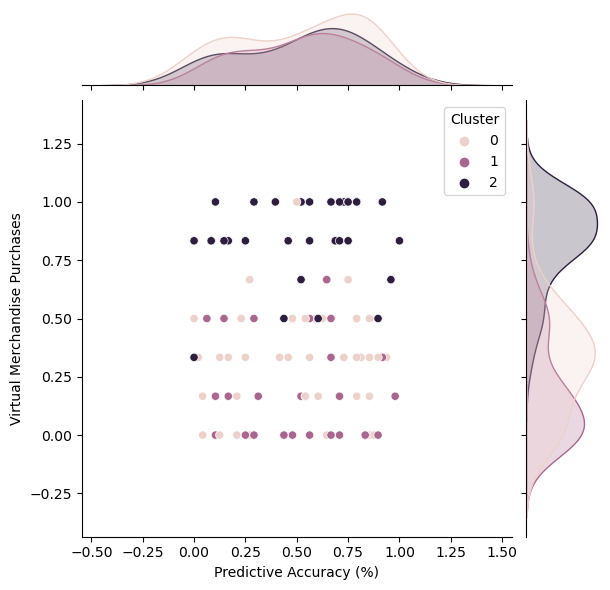

In [73]:
# Joint Plot of Predictive Accuracy and Virtual Merchandise Purchases
plt.figure(figsize=(10, 10))
sns.jointplot(x='Predictive Accuracy (%)', y='Virtual Merchandise Purchases', data=df, kind='scatter', hue='Cluster')
plt.show()

# Joint Plot Analysis:
Most data points cluster between **0.5 and 1.0** for **predictive accuracy** and between **0.0 and 1.0** for **purchases**. **Cluster 2**, our dark purple group, shows a higher concentration of users with both high predictive accuracy and a higher rate of purchasing virtual merchandise. In contrast, **Clusters 0 and 1** have more spread but don’t reach the same high levels in both measures.

In simpler terms, people in **Cluster 2** are the top performers, predicting accurately and buying more.

# Count Plot Cluster-wise

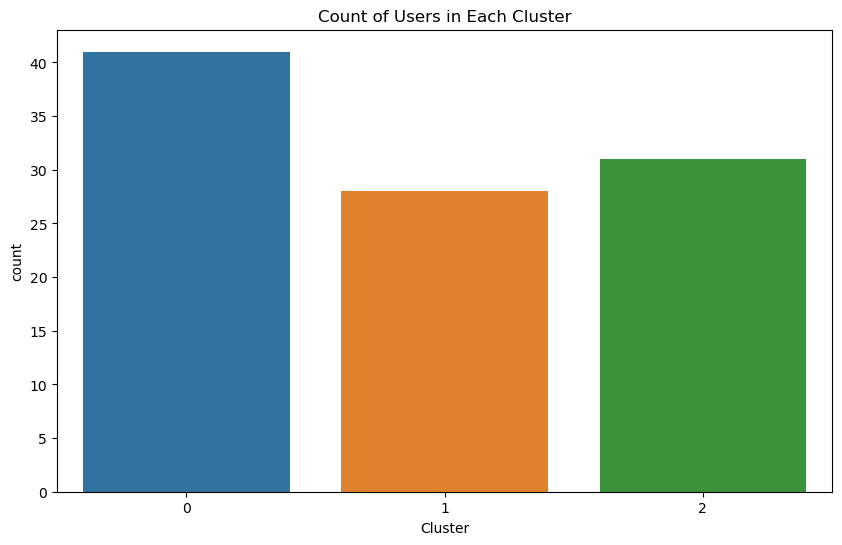

In [74]:
# Count Plot of Clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Count of Users in Each Cluster')
plt.show()

# Count Plot Analysis:
Most users fall into **Cluster 0**, making it the largest group. **Cluster 1** is the smallest group, with fewer users. This distribution suggests that user engagement or behavior characteristics are more common in **Cluster 0**, and less so in **Cluster 1**.

# KDE Plot for Virtual Merchandise Purchases

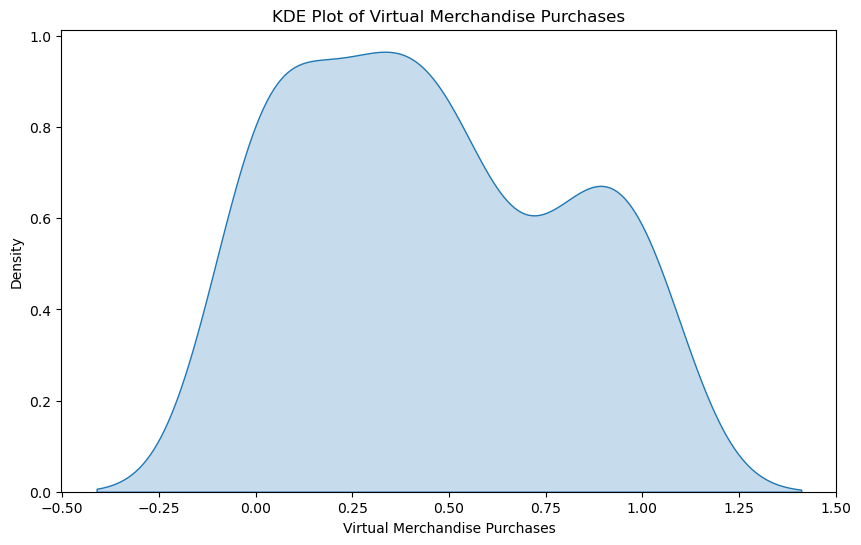

In [75]:
# KDE Plot of Virtual Merchandise Purchases
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Virtual Merchandise Purchases'], fill=True)
plt.title('KDE Plot of Virtual Merchandise Purchases')
plt.xlabel('Virtual Merchandise Purchases')
plt.ylabel('Density')
plt.show()

# Analyzing the KDE Plot:
The density peaks around the **0.5** mark, meaning this is the most common number of purchases among users. There's a noticeable dip around **0.75**, followed by a smaller peak, indicating a secondary group of users who make slightly more purchases. After this, the density gradually decreases towards **1.5**, showing fewer users making very high numbers of purchases.

Overall, this plot reveals that most users tend to make a moderate number of virtual merchandise purchases, with a smaller group making slightly more.

# Scatter Plot of Time on Live 360 vs Virtual Merchandise Purchases

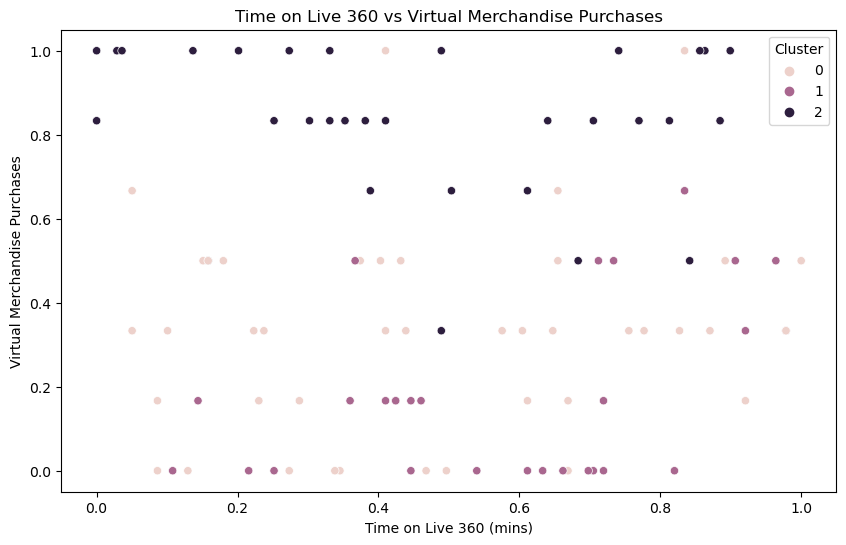

In [76]:
# Time on Live 360 vs Virtual Merchandise Purchases (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time on Live 360 (mins)', y='Virtual Merchandise Purchases', hue='Cluster', data=df)
plt.title('Time on Live 360 vs Virtual Merchandise Purchases')
plt.show()

# Analyzing the Scatter Plot of Time on Live 360 and Virtual Merchandise Purchases:
**Cluster 0** (light pink) is spread out, indicating these users have varied behaviors both in time spent and purchasing. **Cluster 1** (purple) is concentrated in the middle range for both axes, suggesting moderate engagement and purchasing. **Cluster 2** (dark blue) has many points in the higher purchase values, especially around **0.8 to 1.0** on the y-axis, indicating that these users tend to buy more virtual merchandise as they spend more time on **Live 360**.

# Heat Map of Engagement Levels Cluster-wise

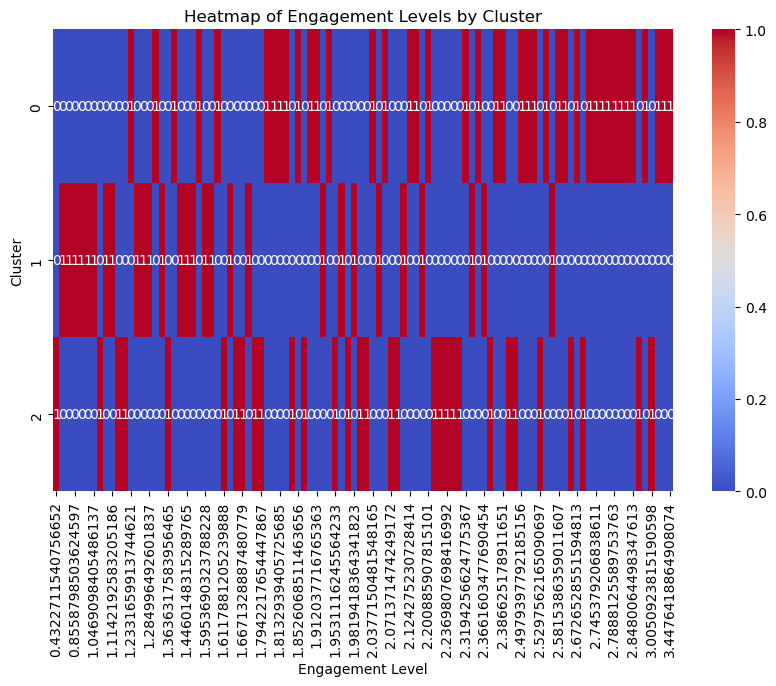

In [77]:
# Heatmap of Engagement Levels by Cluster
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Cluster'], df['Engagement Level']), annot=True, cmap='coolwarm')
plt.title('Heatmap of Engagement Levels by Cluster')
plt.show()

# Analyzing the Heat Map of Engagement Levels Cluster-Wise:
**Cluster 0** shows sporadic bursts of high engagement (red) mixed with low engagement (blue), indicating varied user behavior. **Cluster 1** has more consistent high engagement levels, suggesting these users are generally more engaged. **Cluster 2** is a mix, similar to Cluster 0, but with different patterns, showing some high and some low engagement.

In essence, this heatmap helps us see that **Cluster 1** users are the most engaged overall, while **Clusters 0** and **2** have more variability.

# Bar Plot of Average Predictive Accuracy Cluster-wise

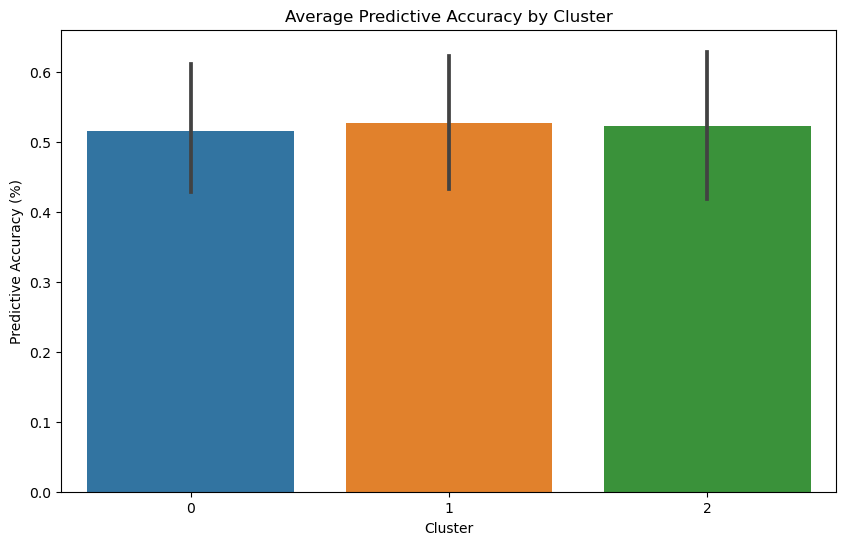

In [78]:
# Bar Plot of Average Predictive Accuracy by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Predictive Accuracy (%)', data=df, estimator=np.mean)
plt.title('Average Predictive Accuracy by Cluster')
plt.show()

# Analyzing the Average Predictive Accuracy Cluster-wise:
We’ve got three clusters (**0**, **1**, and **2**) on the x-axis, each represented by a bar showing their predictive accuracy percentages on the y-axis, which ranges from **0.0 to 0.6**. The bars for Clusters **0** and **1** both hover around **0.5**, indicating their users' predictive accuracy levels are about the same. Cluster **2** has a slightly lower predictive accuracy, close to **0.48**. The error bars, extending from about **0.4 to 0.6**, suggest there’s some variability in these accuracy measurements, but overall, the differences between the clusters are minor.

# Box Plot of Time on Live 360 Cluster-wise

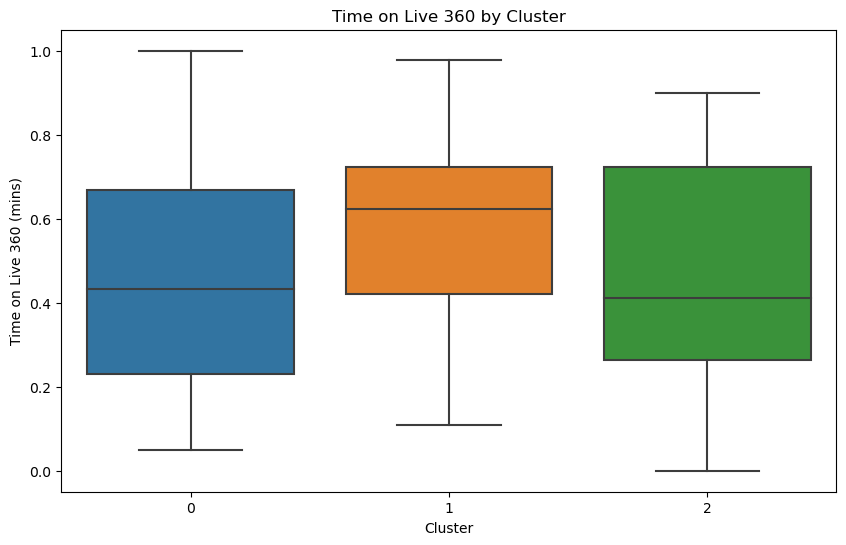

In [79]:
# Box Plot of Time on Live 360 by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Time on Live 360 (mins)', data=df)
plt.title('Time on Live 360 by Cluster')
plt.show()

# Analyzing the Box plot of time on live 360 cluster-wise:
Cluster **0** has a median time of about **0.45 minutes**, with most users spending between roughly **0.25** and **0.65 minutes** on Live 360. Cluster **1** shows a higher median time of around **0.6 minutes**, indicating these users spend more time on the platform. Cluster **1**’s IQR is also wider, ranging from **0.4** to **0.75 minutes**, showing more variability in user engagement. Cluster **2** has a median time of **0.4 minutes**, with an IQR from about **0.2** to **0.7 minutes**, indicating moderate engagement levels.

The whiskers (the lines extending from each box) show the full range of the data, with some outliers extending beyond. This tells us that Cluster **1** users are generally more engaged, spending more time on Live 360, while Clusters **0** and **2** have a wider range of engagement levels but generally spend less time.

# Box Plot of Fan Challenges Completed Cluster-wise

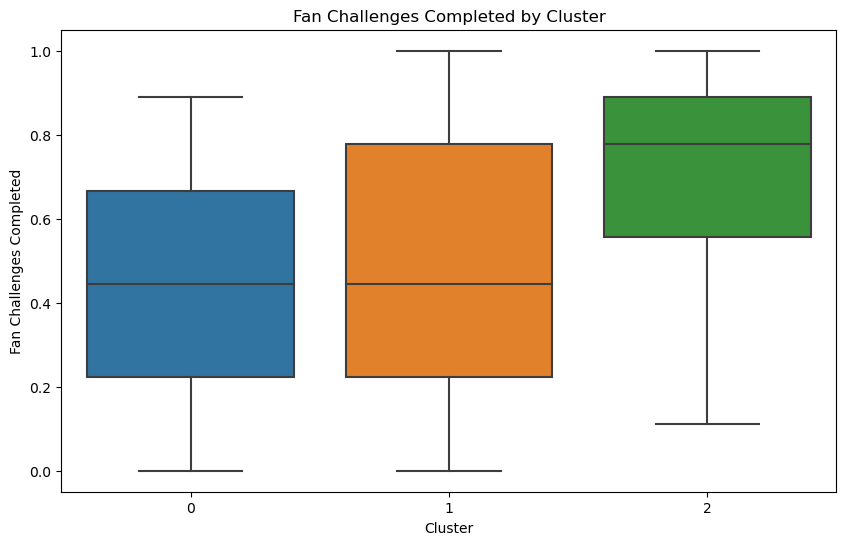

In [80]:
# Box Plot of Fan Challenges Completed by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Fan Challenges Completed', data=df)
plt.title('Fan Challenges Completed by Cluster')
plt.show()

# Analysis of Box Plot of Fan Challenges Completed cluster-wise:
Cluster **0** and Cluster **1** have similar medians, both around **0.45**, indicating moderate engagement. The IQR (Interquartile Range) for Cluster **0** stretches from about **0.25** to **0.65**, and for Cluster **1**, it’s slightly wider, from about **0.25** to **0.75**. This suggests a bit more variability in Cluster **1**’s engagement. In contrast, Cluster **2** has a higher median completion rate of roughly **0.75**, with an IQR from about **0.55** to **0.85**, indicating these users are more engaged, completing more fan challenges on average. The whiskers extend further for Clusters **0** and **1**, showing broader ranges, while Cluster **2** is more concentrated.

In essence, this plot reveals that Cluster **2** users are more actively completing fan challenges compared to Clusters **0** and **1**.

# Bar Plot of Total Virtual Merchandise Purchases

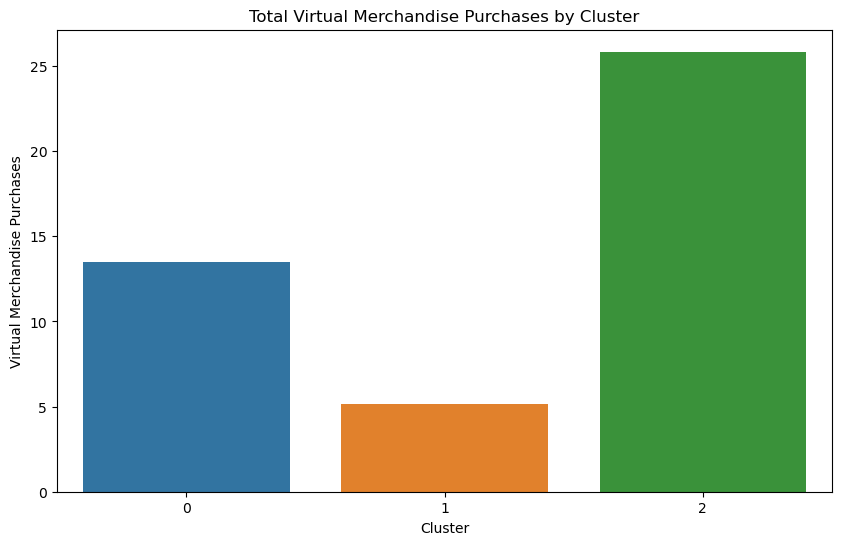

In [81]:
# Bar Plot of Total Virtual Merchandise Purchases by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Virtual Merchandise Purchases', data=df, estimator=sum, errorbar=None)
plt.title('Total Virtual Merchandise Purchases by Cluster')
plt.show()

# Analyzing Bar Plot of Total Virtual Merchandise Purchases Cluster-wise:
Cluster **0** users made about **15** purchases, indicating moderate engagement in buying virtual merchandise. Cluster **1** users, however, show much lower engagement, with only around **5** purchases. Cluster **2** stands out dramatically with over **25** purchases, signifying that these users are the most engaged in buying virtual merchandise.

In short, Cluster **2** users are the big spenders, Cluster **0** users are in the middle, and Cluster **1** users are the least engaged in purchasing.

# Box Plot of Real-Time Chat Activity Cluster-wise

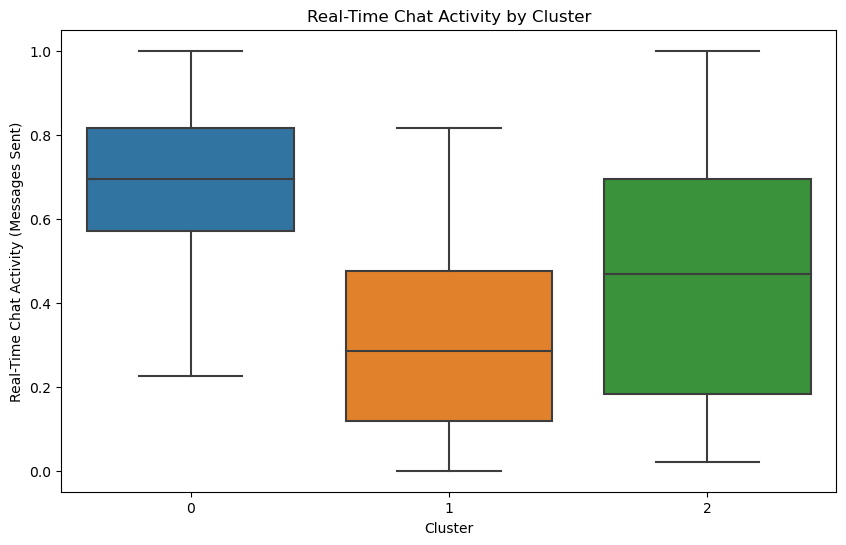

In [82]:
# Box Plot of Real-Time Chat Activity by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Real-Time Chat Activity (Messages Sent)', data=df)
plt.title('Real-Time Chat Activity by Cluster')
plt.show()

# Analysis of Box Plot of Real-Time Chat Activity cluster-wise:
Cluster **0** stands out with a higher median chat activity around **0.7**, indicating that users in this group are quite active in real-time chat. The interquartile range (IQR) for Cluster **0** stretches from about **0.5** to **0.8**, showing that most users in this cluster fall within this range. Cluster **1** has a lower median activity around **0.4**, with an IQR from approximately **0.2** to **0.6**, indicating less engagement overall. Cluster **2** falls in the middle with a median of about **0.5** and an IQR from around **0.3** to **0.7**, showing moderate activity.

This means, Cluster **0** users are the chattiest, Cluster **2** users have moderate engagement, and Cluster **1** users are the least active.

# Based on High Engagement Users Who Spend a Lot of Time on "Live 360", we can propose: "**Live 360 Fan of the Race**"
- **Description**: Complete all fan challenges and engage with at least 5 sponsorships during Live 360 coverage.
- **Predicted Engagement**: High
- **Monetization Potential**: Strong, and also a higher likelihood to purchase exclusive virtual merchandise based on clustering analysis.


# Summary of Dataset Statistics

## Fan Challenges Completed
- **Mean**: 5.79 challenges
- 50% of participants completed 6 challenges, with a minimum of 1 and a maximum of 10.

## Predictive Accuracy
- **Mean accuracy**: 74.99%, with a wide range (50% to 98%).
- Half of the predictions are above 77%, suggesting a relatively strong model performance overall.

## Virtual Merchandise Purchases
- **Mean**: 2.67 purchases, ranging from 0 to 6.
- The 50% mark is at 2 purchases, indicating a moderate level of engagement with virtual merchandise.

## Sponsorship Interactions (Ad Clicks)
- **Mean**: 8.68 clicks, ranging from 0 to 19.
- The median user clicked 8 ads, showing decent interaction with sponsorships, though a significant variance is observed.

## Time on Live 360 (mins)
- **Mean**: 129.35 minutes, with users spending between 60 and 199 minutes.
- Most users (50%) spent around 124.5 minutes.

## Real-Time Chat Activity (Messages Sent)
- **Mean**: 25.05 messages sent, with a standard deviation of 14.16.
- Users sent between 0 and 49 messages, with the median at 25.5.

## Classification Model Results

### Logistic Regression
- **Accuracy**: 83%
- **Precision/Recall**: For predicting True (positive class), precision is 0.83, and recall is 1.00, indicating that the model is quite good at identifying true positives. However, for False predictions, precision and recall are 0.00, meaning the model struggles to identify negative cases.

### Decision Tree
- **Accuracy**: 70%
- **Precision/Recall**: For True, precision is 0.83, and recall is 0.80, slightly lower than logistic regression but still decent. The False precision is very low at 0.17, and the recall is 0.20, showing poor performance in predicting the False class.

### Random Forest
- **Accuracy**: 77%
- **Precision/Recall**: Precision for True is 0.82, and recall is 0.92, but for False, both precision and recall are 0.00. The weighted average accuracy of 77% indicates moderate success in handling the positive class but weak performance for negative predictions.

## Observations
- Across all models, identifying the False class remains a challenge, with precision and recall consistently near zero.
- The logistic regression model achieves the highest accuracy at 83%, followed by the random forest at 77%.
- Based on the metrics, models tend to perform well at identifying positive cases (i.e., predicting that users will engage or convert) but are weak at catching non-engaged users.
